# Mountain Car

In [1]:


import gym
import numpy as np

# Frozen Lake environment setup
epsilon = 0.1
env = gym.make('MountainCar-v0')
total_episodes = 10000
max_steps = 100
alpha = 0.85
gamma = 0.95

# Initialize Q-table
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))

# SARSA algorithm
for episode in range(total_episodes):
    state = env.reset()
    action = env.action_space.sample()
    sum=0
    for step in range(max_steps):
        # Take an action and observe the next state and reward
        next_state, reward, done, _ = env.step(action)
        next_state=np.argmax(next_state)
        sum+=reward
        # Choose the next action using epsilon-greedy policy
        next_action = env.action_space.sample() if np.random.rand() < epsilon else np.argmax(Q[next_state])
        state=np.argmax(state)
        # Update Q-value using SARSA update rule
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

        state = next_state
        action = next_action

        if done:
            break
        reward+=1
    print('episode : '+str(episode)+' reward: '+str(sum))
# Print the optimal Q-values
print("Optimal Q-values:")
print(Q)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Streaming output truncated to the last 5000 lines.
episode : 5003 reward: -100.0
episode : 5004 reward: -100.0
episode : 5005 reward: -100.0
episode : 5006 reward: -100.0
episode : 5007 reward: -100.0
episode : 5008 reward: -100.0
episode : 5009 reward: -100.0
episode : 5010 reward: -100.0
episode : 5011 reward: -100.0
episode : 5012 reward: -100.0
episode : 5013 reward: -100.0
episode : 5014 reward: -100.0
episode : 5015 reward: -100.0
episode : 5016 reward: -100.0
episode : 5017 reward: -100.0
episode : 5018 reward: -100.0
episode : 5019 reward: -100.0
episode : 5020 reward: -100.0
episode : 5021 reward: -100.0
episode : 5022 reward: -100.0
episode : 5023 reward: -100.0
episode : 5024 reward: -100.0
episode : 5025 reward: -100.0
episode : 5026 reward: -100.0
episode : 5027 reward: -100.0
episode : 5028 reward: -100.0
episode : 5029 reward: -100.0
episode : 5030 reward: -100.0
episode : 5031 reward: -100.0
episode : 5032 reward: -100.0
episode : 5033 reward: -100.0
episode : 5034 rewa

# Grid World


In [2]:
import gym
import numpy as np

# Frozen Lake environment setup
epsilon = 0.9
env = gym.make('FrozenLake-v1')
total_episodes = 10000
max_steps = 100
alpha = 0.85
gamma = 0.95

# Initialize Q-table
num_states = env.observation_space.n
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))

# SARSA algorithm
for episode in range(total_episodes):
    state = env.reset()
    action = env.action_space.sample()

    for step in range(max_steps):
        # Take an action and observe the next state and reward
        next_state, reward, done, _ = env.step(action)

        # Choose the next action using epsilon-greedy policy
        next_action = env.action_space.sample() if np.random.rand() < epsilon else np.argmax(Q[next_state])

        # Update Q-value using SARSA update rule
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

        state = next_state
        action = next_action

        if done:
            break

# Print the optimal Q-values
print("Optimal Q-values:")
print(Q)

Optimal Q-values:
[[6.08723506e-04 1.60557165e-03 1.40639474e-03 5.15985573e-03]
 [6.49399064e-03 2.59449024e-04 1.16391314e-04 9.17003646e-04]
 [1.46664832e-03 4.14448305e-03 5.75524305e-04 2.22418604e-03]
 [3.21001887e-04 6.20292308e-03 1.92938184e-03 5.40141491e-04]
 [7.63950023e-04 1.34723680e-06 6.33833150e-04 5.15845203e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.74023182e-02 3.45644773e-09 1.73759964e-03 1.13343332e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.93524592e-04 1.29589273e-03 1.35387022e-01 4.20263732e-03]
 [4.48476145e-03 1.06208292e-02 2.47898144e-02 2.40621241e-04]
 [2.08951899e-02 8.92974009e-02 6.10066210e-05 4.53415856e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.58177261e-03 2.73700094e-03 3.17620529e-02 4.02932758e-01]
 [1.37042009e-01 2.04986690e-02 7.17317352e-01 3.64235293e-02]
 [0.00000000e+00 0.00000000e+00 0.000

# K-Armed Bandit

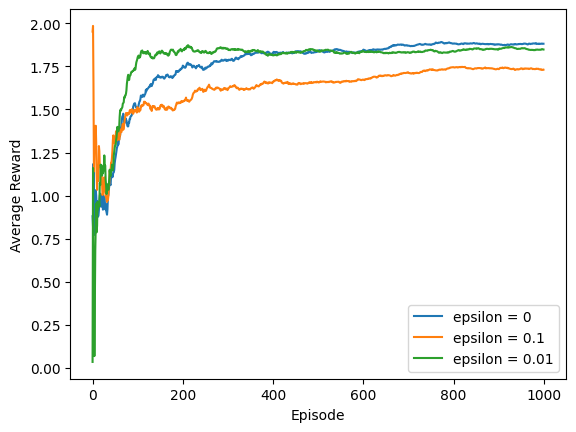

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of arms and the number of episodes
num_arms = 10
num_episodes = 1000

# Define the epsilon values to test
epsilons = [0, 0.1, 0.01]

# Define the true reward distribution for each arm
reward_means = np.random.normal(loc=0, scale=1, size=num_arms)

# Initialize the estimated reward distribution for each arm
estimated_means = np.zeros(num_arms)

# Initialize the number of times each arm has been pulled
num_pulls = np.zeros(num_arms)

# Define the epsilon-greedy action selection function
def epsilon_greedy(epsilon):
    if np.random.uniform() < epsilon:
        # Choose a random arm
        action = np.random.choice(num_arms)
    else:
        # Choose the arm with the highest estimated mean reward
        action = np.argmax(estimated_means)
    return action

# Initialize arrays to store the rewards and average rewards for each episode
rewards = np.zeros((len(epsilons), num_episodes))
avg_rewards = np.zeros((len(epsilons), num_episodes))

# Loop over the episodes
for i in range(num_episodes):
    # Loop over the epsilon values
    for j, epsilon in enumerate(epsilons):
        # Choose an action using the epsilon-greedy method
        action = epsilon_greedy(epsilon)

        # Pull the arm and observe the reward
        reward = np.random.normal(loc=reward_means[action], scale=1)

        # Update the estimated mean reward for the chosen arm
        num_pulls[action] += 1
        estimated_means[action] += (reward - estimated_means[action]) / num_pulls[action]

        # Store the reward and average reward
        rewards[j, i] = reward
        avg_rewards[j, i] = np.mean(rewards[j, :i+1])

# Plot the average rewards for each epsilon value
for j, epsilon in enumerate(epsilons):
    plt.plot(avg_rewards[j, :], label='epsilon = ' + str(epsilon))
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.legend()
plt.show()


# Taxi

In [5]:
import gym
import numpy as np

# Taxi environment setup
env = gym.make('Taxi-v3')
total_episodes = 10000
max_steps = 100
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# Initialize Q-table
num_states = env.observation_space.n
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))

# Q-learning algorithm
for episode in range(total_episodes):
    state = env.reset()

    for step in range(max_steps):
        # Choose an action using epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        # Take the chosen action and observe the next state, reward, and done flag
        next_state, reward, done, _ = env.step(action)

        # Update Q-value using the Q-learning update rule
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

        state = next_state

        if done:
            break

# Evaluate the learned policy
total_rewards = 0
num_eval_episodes = 10
for _ in range(num_eval_episodes):
    state = env.reset()

    for _ in range(max_steps):
        action = np.argmax(Q[state])
        state, reward, done, _ = env.step(action)
        total_rewards += reward

        if done:
            break

average_reward = total_rewards / num_eval_episodes

# Print the average reward
print("Average reward:", average_reward)

Average reward: -2.7


# CartPole

In [6]:
import gym
import numpy as np

# CartPole environment setup
env = gym.make('CartPole-v1')
total_episodes = 1000
max_steps = 200
alpha = 0.1
gamma = 0.9
epsilon = 0.1

# Initialize Q-table
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))

# Q-learning algorithm
for episode in range(total_episodes):
    state = env.reset()
    for step in range(max_steps):
        # Choose an action using epsilon-greedy policy
        state=np.argmax(state)
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        # Take the chosen action and observe the next state, reward, and done flag
        next_state, reward, done, _ = env.step(action)
        next_state = np.argmax(next_state)
        # Update Q-value using the Q-learning update rule
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

        state = next_state

        if done:
            break

# Evaluate the learned policy
total_rewards = 0
num_eval_episodes = 10
for _ in range(num_eval_episodes):
    state = env.reset()

    for _ in range(max_steps):
        state = np.argmax(state)
        action = np.argmax(Q[state])
        state, reward, done, _ = env.step(action)
        total_rewards += reward

        if done:
            break

average_reward = total_rewards / num_eval_episodes

# Print the average reward
print("Average reward:", average_reward)

Average reward: 13.4
